Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Zhongzhi Zhang" #another name Nino
COLLABORATORS = ""

---

# 2019-01-17 Activity: Rootfinding

Rootfinding solves the problem:
* Given: a function $f(x)$ and either
  * initial guess $x_0$ or
  * interval $[a, b]$
* Find: $x$ such that $f(x) = 0$

We'll consider the "interval" variant first.  Before looking at algorithms, let's consider some test functions.

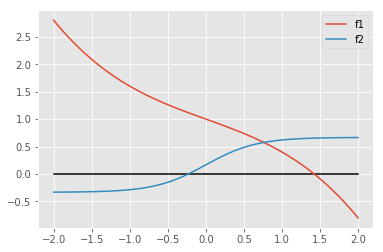

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np

def f1(x):
    return -x**3/10 - x/2 + 1

def f2(x):
    return 1/(1 + np.exp(-3*x)) - 1/3

def plot_all(*funcs):
    x = np.linspace(-2,2,100)
    plt.plot(x, 0*x, color='k')
    for f in funcs:
        plt.plot(x, f(x), label=f.__name__)
    plt.legend(loc='upper right');
    
plot_all(f1, f2)

### Write a quadratic test function that has a simple root at $x=-1/\pi$

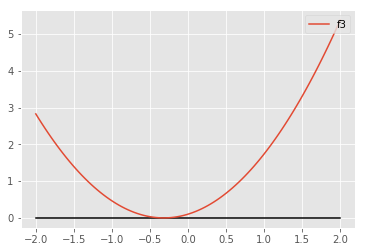

In [44]:
from numpy import pi

def f3(x):
    return (x+1/pi)**2

    """Write a quadratic function (polynomial of degree 2)
    with a simple root at x = -1/pi.
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
plot_all(f3)

In [38]:
assert np.isclose(f3(-1/pi), 0), 'f3(-1/pi) is not a root'
def check_quadratic(f):
    x = np.linspace(-1, 1, 3)
    fit = np.polyfit(x, f3(x), 2)
    assert not np.isclose(fit[0], 0)
    xcheck = np.linspace(-2, 2)
    return np.allclose(f3(xcheck), np.polyval(fit, xcheck))

assert check_quadratic(f3), "f3 is not quadratic"

## Grid search

One method to find roots is to test many points.

In [5]:
def grid_search(f, n):
    """Search n points for an x that minimizes |f(x)|.
    Return x, f(x).
    """
    xgrid = np.linspace(-2, 2, n)
    fgrid = f(xgrid)
    loc = np.argmin(np.abs(fgrid))
    return xgrid[loc], fgrid[loc]

grid_search(f3, 100)

(-0.30303030303030298, 0.00023346566134434536)

### Convergence rate
The cost to run `grid_search(f, n)` is proportional to the number of points `n`.
We are interested in two measures of accuracy, both of which we would like to be near 0.
* **residual**: $f(x)$
* **error**: $x - x_*$ where $x_*$ is the exact root satisfying $f(x_*)=0$

We'll measure the smallness using absolute values.

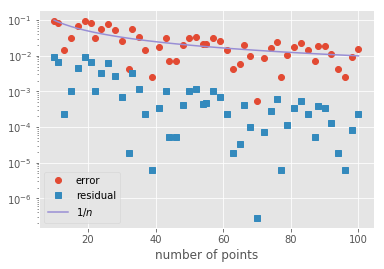

In [6]:
def plot_convergence(f, root, ns, plot=plt.semilogy):
    assert np.isclose(f(root), 0)
    residuals = []
    errors = []
    for n in ns:
        x, res = grid_search(f, n)
        residuals.append(res)
        errors.append(x - root)
    plot(ns, np.abs(errors), 'o', label='error')
    plot(ns, np.abs(residuals), 's', label='residual')
    plot(ns, 1/ns, label='$1/n$');
    plt.legend()
    plt.xlabel('number of points')

plot_convergence(f3, -1/pi, np.linspace(10, 100, dtype=int))

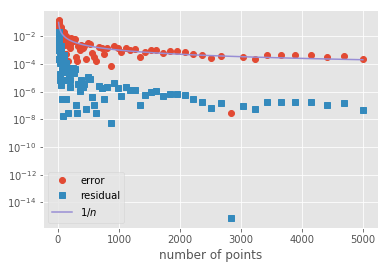

In [7]:
# Nice spacing of points to see effects at large n
# without needing to evaluate the function at so many points.
ns = np.geomspace(10, 5000, 100, dtype=int)
plot_convergence(f3, -1/pi, ns)

### Log-log plots

The line $1/n$ is curved and it's hard to tell how well it represents the data.
It is a straight line on a `loglog` plot, thus much easier to see the linear trend.

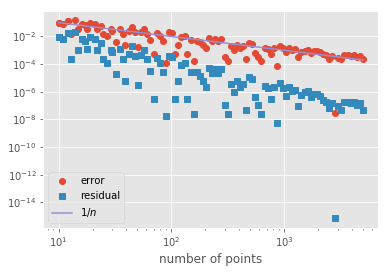

In [8]:
plot_convergence(f3, -1/pi, ns, plt.loglog)

### Convergence rate

We call this behavior, where the error (or residual)
$$ |\text{error}| \le C \frac 1 n $$
(for some positive constant $C$) **linear** convergence.  We sometimes write it in terms of a characteristic grid spacing $h \sim 1/n$ and say that the error is
* $O(1/n)$ (as $n\to \infty$), or
* $O(h)$ (as $h \to 0$)
using [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation).